# 1. Importing libraries #

In Python, it’s essential to import the libraries you’ll use in your project before incorporating them into your code. The method for calling each library may vary, so consult their documentation to find the correct approach. Additionally, you can utilize this cell to configure preferences, such as displaying all columns and rows of a dataset.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn
from mpl_toolkits import mplot3d
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [43]:
tms_dataset = pd.read_csv(r"C:\Users\richm\Desktop\TMS-Season_Benin.csv", na_values=['-'])

C:\Users\richm\AppData\Local\Temp\ipykernel_46904\3792608515.py:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  tms_dataset = pd.read_csv(r"C:\Users\richm\Desktop\TMS-Season_Benin.csv", na_values=['-'])


In [44]:
tms_dataset

,Date,Unnamed: 1,Time,Ra,T_11,T_12,T_13,Humidity_1(%),T°_21,T°_22,T°_23,Humidity_2(%),T°_31,T°_32,T°_33,Humidity_3(%),T°_41,T°_42,T°_43,Humidity_4(%),T°_51,T°_52,T°_53,Humidity_5(%),T°_61,T°_62,T°_63,Humidity_6(%),T°_71,T°_72,T°_73,Humidity_7(%)
0,2023.04.20,NaN,23:50,0.0,30.3750,28.2500,27.7500,21.0,NaN,NaN,NaN,NaN,29.5000,28.3750,27.875,29.7,28.9375,28.500,30.1250,21.3,30.8750,36.0625,36.250,21.8,29.8125,28.500,27.8750,25.4,29.6250,28.250,28.0000,32.9
1,2023.04.21,Day1,0:00,0.0,30.3125,28.2500,27.8125,21.0,29.6250,28.0000,27.875,23.3,29.4375,28.3750,27.875,29.7,28.9375,28.625,30.7500,21.3,31.0000,36.6250,35.875,21.8,29.7500,28.500,27.9375,25.4,29.5625,28.250,28.0000,32.9
2,2023.04.21,NaN,0:10,0.0,30.2500,28.2500,27.8750,21.0,29.6250,28.0625,27.875,23.3,29.3750,28.3750,27.875,29.7,28.9375,28.875,30.6875,21.3,31.1875,37.0000,36.375,21.9,29.7500,28.375,27.8750,25.4,29.5000,28.250,27.9375,32.9
3,2023.04.21,NaN,0:20,0.0,30.2500,28.1875,27.8125,21.0,29.6250,28.0000,27.875,23.3,29.3750,28.3750,27.875,29.7,29.0000,29.000,30.6250,21.3,31.3750,37.1250,36.125,21.9,29.7500,28.375,27.8750,25.4,29.5000,28.250,28.0000,32.9
4,2023.04.21,NaN,0:30,0.0,30.1875,28.1250,27.7500,21.0,29.5625,28.0000,27.875,23.3,29.3750,28.3125,27.875,29.7,29.0000,29.000,30.6875,21.4,31.5625,37.5000,36.250,22.0,29.7500,28.375,27.8750,25.4,29.5000,28.125,27.9375,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613862,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613863,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613864,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613865,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
tms_dataset.shape

(613867, 32)

In [46]:
tms_dataset.head(10000)

,Date,Unnamed: 1,Time,Ra,T_11,T_12,T_13,Humidity_1(%),T°_21,T°_22,T°_23,Humidity_2(%),T°_31,T°_32,T°_33,Humidity_3(%),T°_41,T°_42,T°_43,Humidity_4(%),T°_51,T°_52,T°_53,Humidity_5(%),T°_61,T°_62,T°_63,Humidity_6(%),T°_71,T°_72,T°_73,Humidity_7(%)
0,2023.04.20,NaN,23:50,0.0,30.3750,28.2500,27.7500,21.0,NaN,NaN,NaN,NaN,29.5000,28.3750,27.8750,29.7,28.9375,28.5000,30.1250,21.3,30.8750,36.0625,36.2500,21.8,29.8125,28.5000,27.8750,25.4,29.6250,28.2500,28.0000,32.9
1,2023.04.21,Day1,0:00,0.0,30.3125,28.2500,27.8125,21.0,29.6250,28.0000,27.8750,23.3,29.4375,28.3750,27.8750,29.7,28.9375,28.6250,30.7500,21.3,31.0000,36.6250,35.8750,21.8,29.7500,28.5000,27.9375,25.4,29.5625,28.2500,28.0000,32.9
2,2023.04.21,NaN,0:10,0.0,30.2500,28.2500,27.8750,21.0,29.6250,28.0625,27.8750,23.3,29.3750,28.3750,27.8750,29.7,28.9375,28.8750,30.6875,21.3,31.1875,37.0000,36.3750,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.2500,27.9375,32.9
3,2023.04.21,NaN,0:20,0.0,30.2500,28.1875,27.8125,21.0,29.6250,28.0000,27.8750,23.3,29.3750,28.3750,27.8750,29.7,29.0000,29.0000,30.6250,21.3,31.3750,37.1250,36.1250,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.2500,28.0000,32.9
4,2023.04.21,NaN,0:30,0.0,30.1875,28.1250,27.7500,21.0,29.5625,28.0000,27.8750,23.3,29.3750,28.3125,27.8750,29.7,29.0000,29.0000,30.6875,21.4,31.5625,37.5000,36.2500,22.0,29.7500,28.3750,27.8750,25.4,29.5000,28.1250,27.9375,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023.06.29,NaN,9:40,0.0,26.8750,28.8750,29.6250,29.7,27.2500,29.3750,29.6250,28.3,26.4375,28.1250,28.8125,29.2,26.1250,25.8750,25.2500,24.4,26.2500,24.8750,24.7500,30.0,25.8750,25.6250,25.2500,35.4,26.0000,27.6250,28.7500,38.5
9996,2023.06.29,NaN,9:50,0.0,26.9375,29.0000,29.8750,29.7,27.3750,29.3750,29.5625,28.3,26.5000,28.2500,28.8750,29.3,26.1875,25.8125,25.0625,24.4,26.1875,24.8750,24.6250,30.0,25.8750,25.7500,25.4375,35.4,26.0000,27.6875,28.7500,38.5
9997,2023.06.29,NaN,10:00,0.0,27.0000,29.2500,30.1250,29.7,27.3750,29.6250,29.7500,28.3,26.6250,28.3750,29.1250,29.3,26.1875,25.7500,25.0000,24.4,26.1250,24.8125,24.6250,30.0,25.8750,26.0000,26.0000,35.5,26.0625,28.7500,30.1250,38.5
9998,2023.06.29,NaN,10:10,0.0,27.0625,30.5625,32.5000,29.7,27.5000,31.3125,31.5625,28.3,26.6250,28.8750,30.5000,29.3,26.1875,25.8125,25.0000,24.4,26.1250,24.7500,24.5625,30.0,25.8750,26.1875,26.3125,35.5,26.1250,28.7500,30.1875,38.5


# 2. Data Exploration steps #

When conducting data exploration, keep the following in mind:

*i. Data Cleaning: Plan how you’ll clean the data.*

*ii. Feature Generation: Explore possibilities for creating new features.*

* Missing values
* Outliers
* Categorical values
* Binary values
* Colume types

**2.1 Data Cleaning**

* When initiating a project, your predefined end goal will dictate which column or combination of columns serves as your target column

* Select and retain only the columns that directly contribute to achieving your goal

The target column is what you aim to predict using an ML model. Additionally, the final model will assist in identifying redundant columns that are unnecessary for your analysis. Before diving into data exploration, review all columns with your end goal in mind and exclude any that won’t be used during model training. However, for now, including more information than strictly needed can aid in data exploration and cleanin

**2.1.1 Goal: predicting potential Heat Flux and Evapotranspiration using microclimate variables in two layers of strip and checkboard agrivoltaics setups**

* Applying Machine Learning Decisiontree Classifiers algarithm to predict levels heat flux and evapotranspiration under the two agrivoltaics system types.

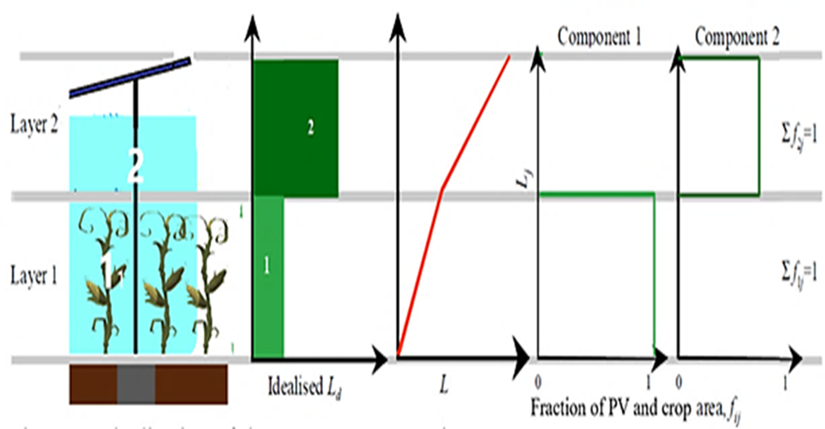

In [47]:
tms_dataset.columns

Index(['Date', 'Unnamed: 1', 'Time', 'Ra', 'T_11', 'T_12', 'T_13',
       'Humidity_1(%)', 'T°_21', 'T°_22', 'T°_23', 'Humidity_2(%)', 'T°_31',
       'T°_32', 'T°_33', 'Humidity_3(%)', 'T°_41', 'T°_42', 'T°_43',
       'Humidity_4(%)', 'T°_51', 'T°_52', 'T°_53', 'Humidity_5(%)', 'T°_61',
       'T°_62', 'T°_63', 'Humidity_6(%)', 'T°_71', 'T°_72', 'T°_73',
       'Humidity_7(%)'],
      dtype='object')

In [48]:
tms_dataset.isna().sum()

Date             601695
Unnamed: 1       613783
Time             601695
Ra                    0
T_11             601695
T_12             601695
T_13             601695
Humidity_1(%)    601695
T°_21            601483
T°_22            601483
T°_23            601483
Humidity_2(%)    601483
T°_31            601693
T°_32            601693
T°_33            601693
Humidity_3(%)    601693
T°_41            600973
T°_42            600973
T°_43            600973
Humidity_4(%)    600973
T°_51            601341
T°_52            601341
T°_53            601341
Humidity_5(%)    601341
T°_61            601680
T°_62            601680
T°_63            601680
Humidity_6(%)    601680
T°_71            601645
T°_72            601645
T°_73            601645
Humidity_7(%)    601645
dtype: int64

In [49]:
tms_dataset_new = tms_dataset[['Date', 'Time','Ra', 'T_11', 'T_12', 'T_13', 'Humidity_1(%)',
       'T°_21', 'T°_22', 'T°_23', 'Humidity_2(%)', 'T°_31', 'T°_32', 'T°_33',
       'Humidity_3(%)', 'T°_41', 'T°_42', 'T°_43', 'Humidity_4(%)', 'T°_51',
       'T°_52', 'T°_53', 'Humidity_5(%)', 'T°_61', 'T°_62', 'T°_63',
       'Humidity_6(%)', 'T°_71', 'T°_72', 'T°_73', 'Humidity_7(%)']]

In [50]:
# Identifying the NAN values
T_11_na = tms_dataset_new[tms_dataset_new["T_11"].isna()]
T_11_na

,Date,Time,Ra,T_11,T_12,T_13,Humidity_1(%),T°_21,T°_22,T°_23,Humidity_2(%),T°_31,T°_32,T°_33,Humidity_3(%),T°_41,T°_42,T°_43,Humidity_4(%),T°_51,T°_52,T°_53,Humidity_5(%),T°_61,T°_62,T°_63,Humidity_6(%),T°_71,T°_72,T°_73,Humidity_7(%)
12172,NaN,NaN,0.0,NaN,NaN,NaN,NaN,27.7500,28.0000,28.2500,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12173,NaN,NaN,0.0,NaN,NaN,NaN,NaN,27.8750,28.1875,28.3750,0.0,28.75,28.0000,26.125,30.2,29.8750,28.8750,27.0000,33.1,27.250,28.0000,27.5000,33.4,29.2500,30.4375,29.500,32.1,28.0625,29.3750,29.5000,38.8
12174,NaN,NaN,0.0,NaN,NaN,NaN,NaN,27.9375,28.2500,28.5000,0.0,26.50,27.4375,30.375,0.0,29.8125,28.8750,26.8125,33.1,27.250,28.1250,27.8750,33.4,29.3125,30.1250,29.000,32.1,28.1250,29.3750,29.5625,38.8
12175,NaN,NaN,0.0,NaN,NaN,NaN,NaN,28.0000,28.3750,28.6875,0.0,NaN,NaN,NaN,NaN,29.7500,28.8125,26.7500,33.1,27.375,28.3125,28.2500,33.5,29.3125,29.9375,28.625,32.1,28.1250,29.3125,29.3750,38.8
12176,NaN,NaN,0.0,NaN,NaN,NaN,NaN,28.1250,28.5000,28.8125,0.0,NaN,NaN,NaN,NaN,29.7500,28.7500,26.6875,33.1,27.375,28.5000,28.6875,33.5,29.2500,29.6875,28.250,32.0,28.1875,29.1875,29.0625,38.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613862,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613863,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613864,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613865,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note**
As you do exploration, consider the following actions to take for data cleaning

Steps to take
* Record Actions During Exploration:
As you explore the data, take note of the necessary actions for cleaning.
* Data Cleaning Steps:
Remove rows where data is missing.
Fill in any NaN (missing) values with zeros/ previous time value/average of the previous or next value.

In [51]:
tms_dataset_new_cleaned = tms_dataset_new.dropna()
tms_dataset_new_cleaned

,Date,Time,Ra,T_11,T_12,T_13,Humidity_1(%),T°_21,T°_22,T°_23,Humidity_2(%),T°_31,T°_32,T°_33,Humidity_3(%),T°_41,T°_42,T°_43,Humidity_4(%),T°_51,T°_52,T°_53,Humidity_5(%),T°_61,T°_62,T°_63,Humidity_6(%),T°_71,T°_72,T°_73,Humidity_7(%)
1,2023.04.21,0:00,0.0,30.3125,28.2500,27.8125,21.0,29.6250,28.0000,27.875,23.3,29.4375,28.3750,27.875,29.7,28.9375,28.6250,30.7500,21.3,31.0000,36.6250,35.8750,21.8,29.7500,28.5000,27.9375,25.4,29.5625,28.2500,28.0000,32.9
2,2023.04.21,0:10,0.0,30.2500,28.2500,27.8750,21.0,29.6250,28.0625,27.875,23.3,29.3750,28.3750,27.875,29.7,28.9375,28.8750,30.6875,21.3,31.1875,37.0000,36.3750,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.2500,27.9375,32.9
3,2023.04.21,0:20,0.0,30.2500,28.1875,27.8125,21.0,29.6250,28.0000,27.875,23.3,29.3750,28.3750,27.875,29.7,29.0000,29.0000,30.6250,21.3,31.3750,37.1250,36.1250,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.2500,28.0000,32.9
4,2023.04.21,0:30,0.0,30.1875,28.1250,27.7500,21.0,29.5625,28.0000,27.875,23.3,29.3750,28.3125,27.875,29.7,29.0000,29.0000,30.6875,21.4,31.5625,37.5000,36.2500,22.0,29.7500,28.3750,27.8750,25.4,29.5000,28.1250,27.9375,32.9
5,2023.04.21,0:40,0.0,30.1250,28.1250,27.8125,21.0,29.5000,27.8750,27.875,23.3,29.3750,28.2500,27.875,29.7,29.0000,29.1250,30.7500,21.4,31.7500,37.8125,36.3125,22.0,29.6875,28.3125,27.8750,25.4,29.5000,28.1250,28.0000,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12167,2023.07.14,11:40,0.0,28.5000,33.6250,34.5625,27.5,27.3750,27.6250,27.750,0.0,27.3750,27.6250,27.875,0.0,26.3750,27.8750,27.6250,28.1,26.9375,26.1250,26.0000,33.6,26.6250,28.2500,29.3125,39.1,27.3750,30.5000,31.6250,39.4
12168,2023.07.14,11:50,0.0,28.6250,33.2500,33.6250,27.5,27.3750,27.6250,27.750,0.0,27.3750,27.6250,27.875,0.0,26.3750,28.0625,28.1250,28.1,26.8750,26.1250,26.0000,33.6,26.7500,28.2500,29.3750,39.1,27.4375,30.3750,31.8125,39.4
12169,2023.07.14,12:00,0.0,28.7500,33.4375,34.4375,27.5,27.3750,27.6250,27.750,0.0,27.4375,27.6250,27.875,0.0,26.5000,28.3750,28.6250,28.1,26.8750,26.1250,26.0000,33.6,26.7500,28.2500,29.3125,39.1,27.5000,30.3125,31.2500,39.4
12170,2023.07.14,12:10,0.0,28.8750,33.2500,33.5625,27.5,27.4375,27.6250,27.750,0.0,27.3750,27.6250,27.875,0.0,26.5000,28.5625,28.6250,28.1,26.8750,26.1250,26.0000,33.6,26.8125,28.3750,29.3750,39.1,27.5000,30.0000,30.8125,39.4


# 3.Data Collection Method 
Sensor information:
Sensor used was the TMS and were 7 in number. These recorded temperature and soil moisure at different levels above ground. One sensor for the control area, three sensors within the strip agrivoltaic setup area and the remaining three in the checkerboard area. see information of the sensor below: 

!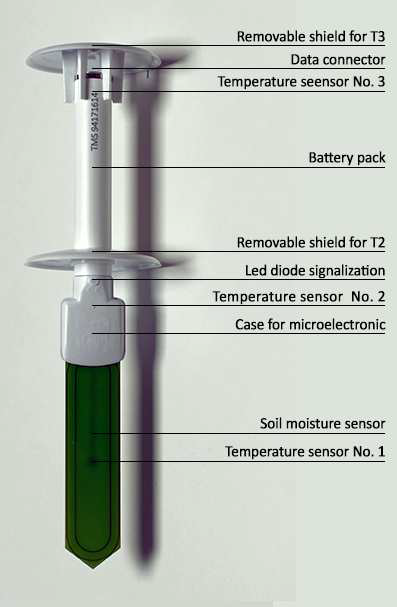

**3.1 Feature Renaming** 
To better understand the features and to reflect the recorded data we needed to correct and rename the data features.

To change the names of the features (columns) of a tabular dataset in pandas, you can use the rename() method or directly assign a new list of column names to the columns attribute of the DataFrame.

3.1.1 Data Dictionary/Schema

| Column Name              | Description                                           | Unit       |
|--------------------------|-------------------------------------------------------|------------|
| Date                     | Date of the recorded data                             |            |
| Time                     | Time of the recorded data                             |            |
| Ra                       |direct irradiance on a plane always normal to sun rays |(W/m2)		|						
|control_Soil_temp         | Soil temperature in the control area                  | °C         |
| control_layer1_temp      | Layer 1 temperature in the control area               | °C         |
| control_layer2_temp      | Layer 2 temperature in the control area               | °C         |
| control_soil_moisture    | Soil moisture in the control area                     | %          |
| strip_AV_soil_tempS2     | Soil temperature in the strip agrivoltaic setup (Sensor 2) | °C   |
| strip_AV_layer1_tempS2   | Layer 1 temperature in the strip agrivoltaic setup (Sensor 2) | °C   |
| strip_AV_layer2_tempS2   | Layer 2 temperature in the strip agrivoltaic setup (Sensor 2) | °C   |
| ...                      | Repeat for other sensors (S3, S4, S5, S6, S7) |          |
| checkboard_soil_tempS7   | Soil temperature in the checkerboard area (Sensor 7)  | °C         |
| checkboard_layer1_tempS7 | Layer 1 temperature in the checkerboard area (Sensor 7) | °C         |
| checkboard_layer2_tempS7 | Layer 2 temperature in the checkerboard area (Sensor 7) | °C         |
| checkboard_soil_moistureS7 | Soil moisture in the checkerboard area (Sensor 7)    | %          |


In [52]:
# renaming column
tms_dataset_new_cleaned.rename(columns={'T_11': 'control_Soil_temp', 'T_12': 'control_layer1_temp', 'T_13': 'control_layer2_temp', 'Humidity_1(%)': 'control_soil_moisture',
       'T°_21': 'strip_soil_tempS2', 'T°_22': 'strip_layer1_tempS2', 'T°_23': 'strip_layer2_tempS2', 'Humidity_2(%)': 'strip_soil_moistureS2', 'T°_31': 'strip_soil_tempS3', 'T°_32': 'strip_layer1_tempS3', 'T°_33':'strip_layer2_tempS3',
       'Humidity_3(%)' :'strip_soil_moistureS3', 'T°_41': 'strip_soil_tempS4', 'T°_42': 'strip_AV_layer1_tempS4', 'T°_43': 'strip_layer2_tempS4', 'Humidity_4(%)':'strip_soil_moisturS4', 'T°_51': 'checkboard_soil_tempS5',
       'T°_52': 'checkboard_layer1_tempS5', 'T°_53': 'checkboard_layer2_tempS5', 'Humidity_5(%)':'checkboard_soil_moistureS5', 'T°_61': 'checkboard_soil_tempS6', 'T°_62': 'checkboard_layer1_tempS6', 'T°_63': 'checkboard_layer2_tempS6',
       'Humidity_6(%)': 'checkboard_soil_moistureS6', 'T°_71': 'checkboard_soil_tempS7', 'T°_72':'checkboard_layer1_tempS7', 'T°_73':'checkboard_layer2_tempS7', 'Humidity_7(%)':'checkboard_soil_moistureS7'}, inplace=True)

C:\Users\richm\AppData\Local\Temp\ipykernel_46904\1719842094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tms_dataset_new_cleaned.rename(columns={'T_11': 'control_Soil_temp', 'T_12': 'control_layer1_temp', 'T_13': 'control_layer2_temp', 'Humidity_1(%)': 'control_soil_moisture',


In [53]:
tms_dataset_new_cleaned.head()

,Date,Time,Ra,control_Soil_temp,control_layer1_temp,control_layer2_temp,control_soil_moisture,strip_soil_tempS2,strip_layer1_tempS2,strip_layer2_tempS2,strip_soil_moistureS2,strip_soil_tempS3,strip_layer1_tempS3,strip_layer2_tempS3,strip_soil_moistureS3,strip_soil_tempS4,strip_AV_layer1_tempS4,strip_layer2_tempS4,strip_soil_moisturS4,checkboard_soil_tempS5,checkboard_layer1_tempS5,checkboard_layer2_tempS5,checkboard_soil_moistureS5,checkboard_soil_tempS6,checkboard_layer1_tempS6,checkboard_layer2_tempS6,checkboard_soil_moistureS6,checkboard_soil_tempS7,checkboard_layer1_tempS7,checkboard_layer2_tempS7,checkboard_soil_moistureS7
1,2023.04.21,0:00,0.0,30.3125,28.2500,27.8125,21.0,29.6250,28.0000,27.875,23.3,29.4375,28.3750,27.875,29.7,28.9375,28.625,30.7500,21.3,31.0000,36.6250,35.8750,21.8,29.7500,28.5000,27.9375,25.4,29.5625,28.250,28.0000,32.9
2,2023.04.21,0:10,0.0,30.2500,28.2500,27.8750,21.0,29.6250,28.0625,27.875,23.3,29.3750,28.3750,27.875,29.7,28.9375,28.875,30.6875,21.3,31.1875,37.0000,36.3750,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.250,27.9375,32.9
3,2023.04.21,0:20,0.0,30.2500,28.1875,27.8125,21.0,29.6250,28.0000,27.875,23.3,29.3750,28.3750,27.875,29.7,29.0000,29.000,30.6250,21.3,31.3750,37.1250,36.1250,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.250,28.0000,32.9
4,2023.04.21,0:30,0.0,30.1875,28.1250,27.7500,21.0,29.5625,28.0000,27.875,23.3,29.3750,28.3125,27.875,29.7,29.0000,29.000,30.6875,21.4,31.5625,37.5000,36.2500,22.0,29.7500,28.3750,27.8750,25.4,29.5000,28.125,27.9375,32.9
5,2023.04.21,0:40,0.0,30.1250,28.1250,27.8125,21.0,29.5000,27.8750,27.875,23.3,29.3750,28.2500,27.875,29.7,29.0000,29.125,30.7500,21.4,31.7500,37.8125,36.3125,22.0,29.6875,28.3125,27.8750,25.4,29.5000,28.125,28.0000,32.9


In [54]:
tms_dataset_new_cleaned.shape

(12171, 31)

In [55]:
tms_dataset_new_cleaned.columns

Index(['Date', 'Time', 'Ra', 'control_Soil_temp', 'control_layer1_temp',
       'control_layer2_temp', 'control_soil_moisture', 'strip_soil_tempS2',
       'strip_layer1_tempS2', 'strip_layer2_tempS2', 'strip_soil_moistureS2',
       'strip_soil_tempS3', 'strip_layer1_tempS3', 'strip_layer2_tempS3',
       'strip_soil_moistureS3', 'strip_soil_tempS4', 'strip_AV_layer1_tempS4',
       'strip_layer2_tempS4', 'strip_soil_moisturS4', 'checkboard_soil_tempS5',
       'checkboard_layer1_tempS5', 'checkboard_layer2_tempS5',
       'checkboard_soil_moistureS5', 'checkboard_soil_tempS6',
       'checkboard_layer1_tempS6', 'checkboard_layer2_tempS6',
       'checkboard_soil_moistureS6', 'checkboard_soil_tempS7',
       'checkboard_layer1_tempS7', 'checkboard_layer2_tempS7',
       'checkboard_soil_moistureS7'],
      dtype='object')

3.2 Data Visualiztion

An interesting part of data preparation is visualizing the data to find imperfections. Data visualization helps to explore it.  A great way is using histograms to take an initial outlook of the dataset.

A histogram displays the frequency (y-axis) of occurrence for specific values (x-axis) in a dataset. The x-axis covers the entire range of values. If you encounter a histogram where only one value (e.g., 0) appears, but the x-axis extends to 100, it indicates that there are values around 100. However, their occurrence is so infrequent that they appear invisible on the graph. This situation may suggest the presence of outliers, prompting a closer examination of these data points.

array([[<AxesSubplot:title={'center':'Ra'}>,
        <AxesSubplot:title={'center':'control_Soil_temp'}>,
        <AxesSubplot:title={'center':'control_layer1_temp'}>,
        <AxesSubplot:title={'center':'control_layer2_temp'}>,
        <AxesSubplot:title={'center':'control_soil_moisture'}>],
       [<AxesSubplot:title={'center':'strip_soil_tempS2'}>,
        <AxesSubplot:title={'center':'strip_layer1_tempS2'}>,
        <AxesSubplot:title={'center':'strip_layer2_tempS2'}>,
        <AxesSubplot:title={'center':'strip_soil_moistureS2'}>,
        <AxesSubplot:title={'center':'strip_soil_tempS3'}>],
       [<AxesSubplot:title={'center':'strip_layer1_tempS3'}>,
        <AxesSubplot:title={'center':'strip_layer2_tempS3'}>,
        <AxesSubplot:title={'center':'strip_soil_moistureS3'}>,
        <AxesSubplot:title={'center':'strip_soil_tempS4'}>,
        <AxesSubplot:title={'center':'strip_AV_layer1_tempS4'}>],
       [<AxesSubplot:title={'center':'strip_layer2_tempS4'}>,
        <AxesSubplot:

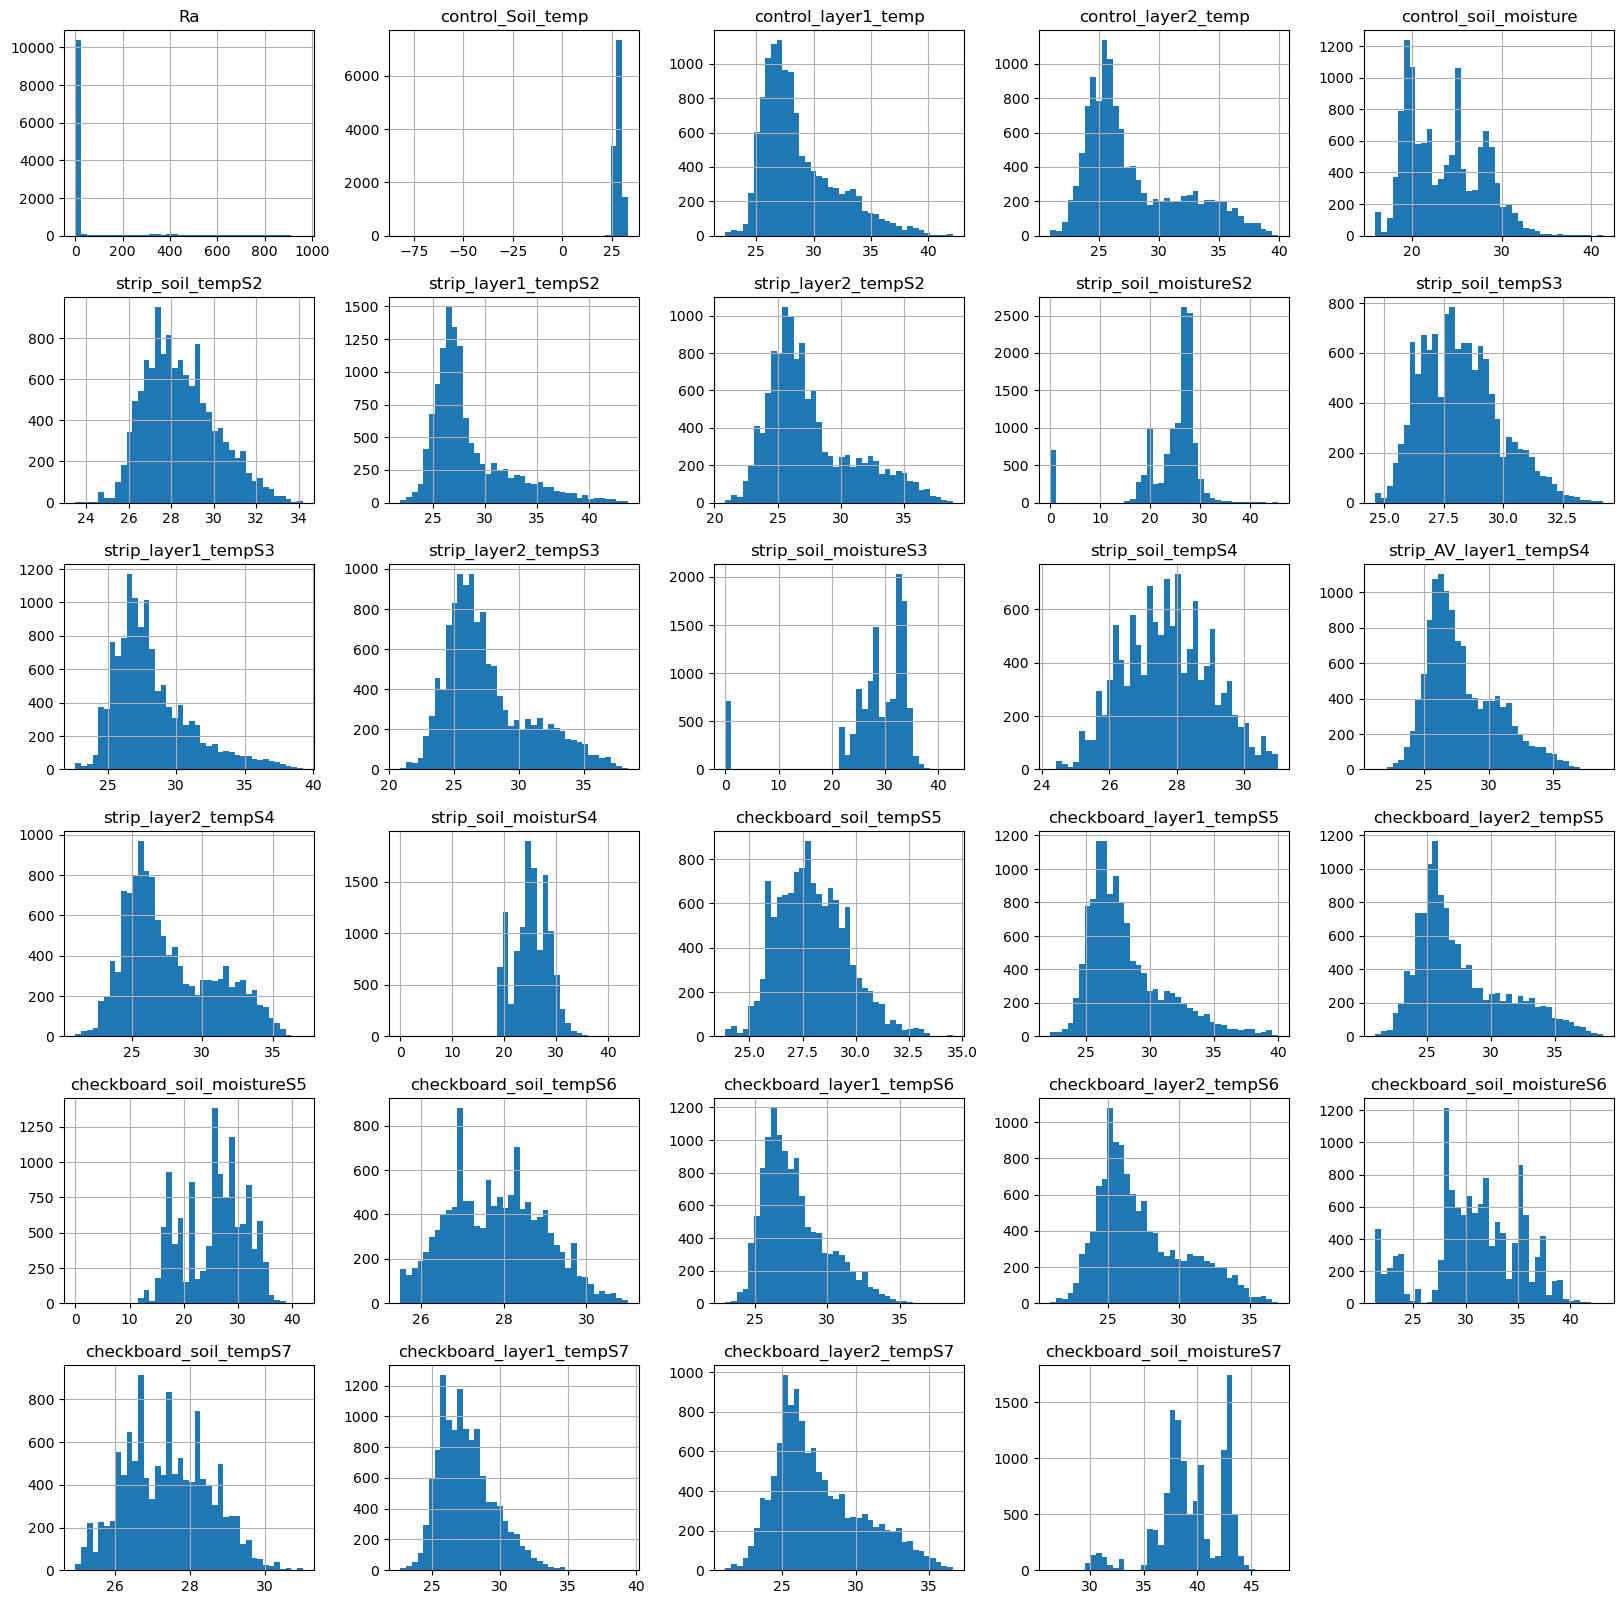

In [56]:
tms_dataset_new_cleaned.hist(bins=40, figsize=(20,20))

**Note**

Occasionally, data issues may not be immediately apparent. One effective approach to identify such problems is by examining the column types. If a column is expected to contain float values but is instead categorized as an object (or string), it serves as an indication that something might be amiss

In [57]:
tms_dataset_new_cleaned.dtypes

Date                           object
Time                           object
Ra                            float64
control_Soil_temp             float64
control_layer1_temp           float64
control_layer2_temp           float64
control_soil_moisture         float64
strip_soil_tempS2             float64
strip_layer1_tempS2           float64
strip_layer2_tempS2           float64
strip_soil_moistureS2         float64
strip_soil_tempS3             float64
strip_layer1_tempS3           float64
strip_layer2_tempS3           float64
strip_soil_moistureS3         float64
strip_soil_tempS4             float64
strip_AV_layer1_tempS4        float64
strip_layer2_tempS4           float64
strip_soil_moisturS4          float64
checkboard_soil_tempS5        float64
checkboard_layer1_tempS5      float64
checkboard_layer2_tempS5      float64
checkboard_soil_moistureS5    float64
checkboard_soil_tempS6        float64
checkboard_layer1_tempS6      float64
checkboard_layer2_tempS6      float64
checkboard_s

***3.2.1 Cleaning Categorical Values:*** 

Make sure categorical values are clean. It’s advisable to examine the existance and if exists, their distribution to ensure there are no outliers or unexpected values. Here we use

<AxesSubplot:xlabel='Date'>

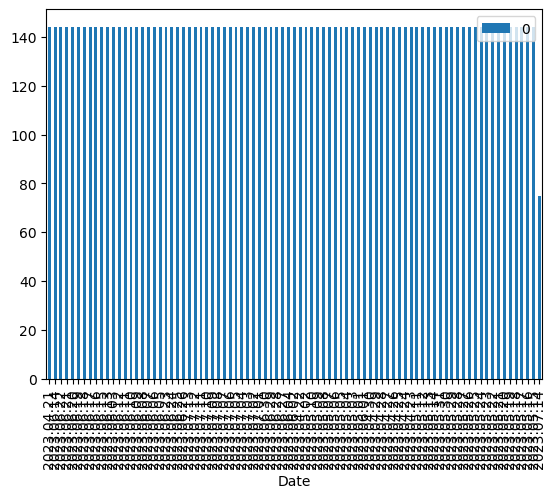

In [58]:
pd.DataFrame(tms_dataset_new_cleaned.value_counts('Date')).plot(kind='bar')

In [59]:
tms_dataset_new_cleaned.columns

Index(['Date', 'Time', 'Ra', 'control_Soil_temp', 'control_layer1_temp',
       'control_layer2_temp', 'control_soil_moisture', 'strip_soil_tempS2',
       'strip_layer1_tempS2', 'strip_layer2_tempS2', 'strip_soil_moistureS2',
       'strip_soil_tempS3', 'strip_layer1_tempS3', 'strip_layer2_tempS3',
       'strip_soil_moistureS3', 'strip_soil_tempS4', 'strip_AV_layer1_tempS4',
       'strip_layer2_tempS4', 'strip_soil_moisturS4', 'checkboard_soil_tempS5',
       'checkboard_layer1_tempS5', 'checkboard_layer2_tempS5',
       'checkboard_soil_moistureS5', 'checkboard_soil_tempS6',
       'checkboard_layer1_tempS6', 'checkboard_layer2_tempS6',
       'checkboard_soil_moistureS6', 'checkboard_soil_tempS7',
       'checkboard_layer1_tempS7', 'checkboard_layer2_tempS7',
       'checkboard_soil_moistureS7'],
      dtype='object')

In [60]:
tms_dataset_new_cleaned['Date'] = pd.to_datetime(tms_dataset_new_cleaned['Date'])
tms_dataset_new_cleaned

C:\Users\richm\AppData\Local\Temp\ipykernel_46904\1692690360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tms_dataset_new_cleaned['Date'] = pd.to_datetime(tms_dataset_new_cleaned['Date'])


,Date,Time,Ra,control_Soil_temp,control_layer1_temp,control_layer2_temp,control_soil_moisture,strip_soil_tempS2,strip_layer1_tempS2,strip_layer2_tempS2,strip_soil_moistureS2,strip_soil_tempS3,strip_layer1_tempS3,strip_layer2_tempS3,strip_soil_moistureS3,strip_soil_tempS4,strip_AV_layer1_tempS4,strip_layer2_tempS4,strip_soil_moisturS4,checkboard_soil_tempS5,checkboard_layer1_tempS5,checkboard_layer2_tempS5,checkboard_soil_moistureS5,checkboard_soil_tempS6,checkboard_layer1_tempS6,checkboard_layer2_tempS6,checkboard_soil_moistureS6,checkboard_soil_tempS7,checkboard_layer1_tempS7,checkboard_layer2_tempS7,checkboard_soil_moistureS7
1,2023-04-21,0:00,0.0,30.3125,28.2500,27.8125,21.0,29.6250,28.0000,27.875,23.3,29.4375,28.3750,27.875,29.7,28.9375,28.6250,30.7500,21.3,31.0000,36.6250,35.8750,21.8,29.7500,28.5000,27.9375,25.4,29.5625,28.2500,28.0000,32.9
2,2023-04-21,0:10,0.0,30.2500,28.2500,27.8750,21.0,29.6250,28.0625,27.875,23.3,29.3750,28.3750,27.875,29.7,28.9375,28.8750,30.6875,21.3,31.1875,37.0000,36.3750,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.2500,27.9375,32.9
3,2023-04-21,0:20,0.0,30.2500,28.1875,27.8125,21.0,29.6250,28.0000,27.875,23.3,29.3750,28.3750,27.875,29.7,29.0000,29.0000,30.6250,21.3,31.3750,37.1250,36.1250,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.2500,28.0000,32.9
4,2023-04-21,0:30,0.0,30.1875,28.1250,27.7500,21.0,29.5625,28.0000,27.875,23.3,29.3750,28.3125,27.875,29.7,29.0000,29.0000,30.6875,21.4,31.5625,37.5000,36.2500,22.0,29.7500,28.3750,27.8750,25.4,29.5000,28.1250,27.9375,32.9
5,2023-04-21,0:40,0.0,30.1250,28.1250,27.8125,21.0,29.5000,27.8750,27.875,23.3,29.3750,28.2500,27.875,29.7,29.0000,29.1250,30.7500,21.4,31.7500,37.8125,36.3125,22.0,29.6875,28.3125,27.8750,25.4,29.5000,28.1250,28.0000,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12167,2023-07-14,11:40,0.0,28.5000,33.6250,34.5625,27.5,27.3750,27.6250,27.750,0.0,27.3750,27.6250,27.875,0.0,26.3750,27.8750,27.6250,28.1,26.9375,26.1250,26.0000,33.6,26.6250,28.2500,29.3125,39.1,27.3750,30.5000,31.6250,39.4
12168,2023-07-14,11:50,0.0,28.6250,33.2500,33.6250,27.5,27.3750,27.6250,27.750,0.0,27.3750,27.6250,27.875,0.0,26.3750,28.0625,28.1250,28.1,26.8750,26.1250,26.0000,33.6,26.7500,28.2500,29.3750,39.1,27.4375,30.3750,31.8125,39.4
12169,2023-07-14,12:00,0.0,28.7500,33.4375,34.4375,27.5,27.3750,27.6250,27.750,0.0,27.4375,27.6250,27.875,0.0,26.5000,28.3750,28.6250,28.1,26.8750,26.1250,26.0000,33.6,26.7500,28.2500,29.3125,39.1,27.5000,30.3125,31.2500,39.4
12170,2023-07-14,12:10,0.0,28.8750,33.2500,33.5625,27.5,27.4375,27.6250,27.750,0.0,27.3750,27.6250,27.875,0.0,26.5000,28.5625,28.6250,28.1,26.8750,26.1250,26.0000,33.6,26.8125,28.3750,29.3750,39.1,27.5000,30.0000,30.8125,39.4


In [61]:
df = tms_dataset_new_cleaned
df.index= pd.to_datetime(df['Date'], ['Time'])
df[(df.index.day == 21) & (df.index.month == 4)]

,Date,Time,Ra,control_Soil_temp,control_layer1_temp,control_layer2_temp,control_soil_moisture,strip_soil_tempS2,strip_layer1_tempS2,strip_layer2_tempS2,strip_soil_moistureS2,strip_soil_tempS3,strip_layer1_tempS3,strip_layer2_tempS3,strip_soil_moistureS3,strip_soil_tempS4,strip_AV_layer1_tempS4,strip_layer2_tempS4,strip_soil_moisturS4,checkboard_soil_tempS5,checkboard_layer1_tempS5,checkboard_layer2_tempS5,checkboard_soil_moistureS5,checkboard_soil_tempS6,checkboard_layer1_tempS6,checkboard_layer2_tempS6,checkboard_soil_moistureS6,checkboard_soil_tempS7,checkboard_layer1_tempS7,checkboard_layer2_tempS7,checkboard_soil_moistureS7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-21,2023-04-21,0:00,0.0,30.3125,28.2500,27.8125,21.0,29.6250,28.0000,27.8750,23.3,29.4375,28.3750,27.8750,29.7,28.9375,28.6250,30.7500,21.3,31.0000,36.6250,35.8750,21.8,29.7500,28.5000,27.9375,25.4,29.5625,28.2500,28.0000,32.9
2023-04-21,2023-04-21,0:10,0.0,30.2500,28.2500,27.8750,21.0,29.6250,28.0625,27.8750,23.3,29.3750,28.3750,27.8750,29.7,28.9375,28.8750,30.6875,21.3,31.1875,37.0000,36.3750,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.2500,27.9375,32.9
2023-04-21,2023-04-21,0:20,0.0,30.2500,28.1875,27.8125,21.0,29.6250,28.0000,27.8750,23.3,29.3750,28.3750,27.8750,29.7,29.0000,29.0000,30.6250,21.3,31.3750,37.1250,36.1250,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.2500,28.0000,32.9
2023-04-21,2023-04-21,0:30,0.0,30.1875,28.1250,27.7500,21.0,29.5625,28.0000,27.8750,23.3,29.3750,28.3125,27.8750,29.7,29.0000,29.0000,30.6875,21.4,31.5625,37.5000,36.2500,22.0,29.7500,28.3750,27.8750,25.4,29.5000,28.1250,27.9375,32.9
2023-04-21,2023-04-21,0:40,0.0,30.1250,28.1250,27.8125,21.0,29.5000,27.8750,27.8750,23.3,29.3750,28.2500,27.8750,29.7,29.0000,29.1250,30.7500,21.4,31.7500,37.8125,36.3125,22.0,29.6875,28.3125,27.8750,25.4,29.5000,28.1250,28.0000,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21,2023-04-21,23:10,0.0,30.3750,28.5625,28.0000,24.7,30.0000,28.3750,28.3750,27.1,29.8750,28.7500,28.3750,30.1,29.0000,28.3125,27.7500,20.6,28.6250,25.5000,23.1250,21.6,29.5000,28.6250,28.2500,29.3,29.3750,28.5000,28.4375,30.7
2023-04-21,2023-04-21,23:20,0.0,30.3750,28.5000,27.7500,24.7,30.0000,28.3750,28.2500,27.1,29.8750,28.7500,28.2500,30.1,29.0000,28.2500,28.0000,20.6,28.6250,25.5000,23.1250,21.6,29.5000,28.5625,28.3750,29.3,29.3750,28.3750,28.5000,30.7
2023-04-21,2023-04-21,23:30,0.0,30.3125,28.3750,27.8750,24.7,29.8750,28.2500,28.3125,27.2,29.8125,28.6250,28.3125,30.1,29.0000,28.2500,28.3125,20.6,28.5000,25.3750,23.0000,21.6,29.5000,28.5000,28.3750,29.3,29.3750,28.3750,28.5000,30.7


In [62]:
df.columns

Index(['Date', 'Time', 'Ra', 'control_Soil_temp', 'control_layer1_temp',
       'control_layer2_temp', 'control_soil_moisture', 'strip_soil_tempS2',
       'strip_layer1_tempS2', 'strip_layer2_tempS2', 'strip_soil_moistureS2',
       'strip_soil_tempS3', 'strip_layer1_tempS3', 'strip_layer2_tempS3',
       'strip_soil_moistureS3', 'strip_soil_tempS4', 'strip_AV_layer1_tempS4',
       'strip_layer2_tempS4', 'strip_soil_moisturS4', 'checkboard_soil_tempS5',
       'checkboard_layer1_tempS5', 'checkboard_layer2_tempS5',
       'checkboard_soil_moistureS5', 'checkboard_soil_tempS6',
       'checkboard_layer1_tempS6', 'checkboard_layer2_tempS6',
       'checkboard_soil_moistureS6', 'checkboard_soil_tempS7',
       'checkboard_layer1_tempS7', 'checkboard_layer2_tempS7',
       'checkboard_soil_moistureS7'],
      dtype='object')

In [63]:
df.head(1)

,Date,Time,Ra,control_Soil_temp,control_layer1_temp,control_layer2_temp,control_soil_moisture,strip_soil_tempS2,strip_layer1_tempS2,strip_layer2_tempS2,strip_soil_moistureS2,strip_soil_tempS3,strip_layer1_tempS3,strip_layer2_tempS3,strip_soil_moistureS3,strip_soil_tempS4,strip_AV_layer1_tempS4,strip_layer2_tempS4,strip_soil_moisturS4,checkboard_soil_tempS5,checkboard_layer1_tempS5,checkboard_layer2_tempS5,checkboard_soil_moistureS5,checkboard_soil_tempS6,checkboard_layer1_tempS6,checkboard_layer2_tempS6,checkboard_soil_moistureS6,checkboard_soil_tempS7,checkboard_layer1_tempS7,checkboard_layer2_tempS7,checkboard_soil_moistureS7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-21,2023-04-21,0:00,0.0,30.3125,28.25,27.8125,21.0,29.625,28.0,27.875,23.3,29.4375,28.375,27.875,29.7,28.9375,28.625,30.75,21.3,31.0,36.625,35.875,21.8,29.75,28.5,27.9375,25.4,29.5625,28.25,28.0,32.9


In [64]:
df_clean = df[['Date', 'Time', 'Ra', 'control_Soil_temp', 'control_layer1_temp',
       'control_layer2_temp', 'control_soil_moisture', 'strip_soil_tempS2',
       'strip_layer1_tempS2', 'strip_layer2_tempS2', 'strip_soil_moistureS2',
       'strip_soil_tempS3', 'strip_layer1_tempS3', 'strip_layer2_tempS3',
       'strip_soil_moistureS3', 'strip_soil_tempS4',
       'strip_AV_layer1_tempS4', 'strip_layer2_tempS4',
       'strip_soil_moisturS4', 'checkboard_soil_tempS5',
       'checkboard_layer1_tempS5', 'checkboard_layer2_tempS5',
       'checkboard_soil_moistureS5', 'checkboard_soil_tempS6',
       'checkboard_layer1_tempS6', 'checkboard_layer2_tempS6',
       'checkboard_soil_moistureS6', 'checkboard_soil_tempS7',
       'checkboard_layer1_tempS7', 'checkboard_layer2_tempS7',
       'checkboard_soil_moistureS7']]

In [65]:
df_clean

,Date,Time,Ra,control_Soil_temp,control_layer1_temp,control_layer2_temp,control_soil_moisture,strip_soil_tempS2,strip_layer1_tempS2,strip_layer2_tempS2,strip_soil_moistureS2,strip_soil_tempS3,strip_layer1_tempS3,strip_layer2_tempS3,strip_soil_moistureS3,strip_soil_tempS4,strip_AV_layer1_tempS4,strip_layer2_tempS4,strip_soil_moisturS4,checkboard_soil_tempS5,checkboard_layer1_tempS5,checkboard_layer2_tempS5,checkboard_soil_moistureS5,checkboard_soil_tempS6,checkboard_layer1_tempS6,checkboard_layer2_tempS6,checkboard_soil_moistureS6,checkboard_soil_tempS7,checkboard_layer1_tempS7,checkboard_layer2_tempS7,checkboard_soil_moistureS7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-21,2023-04-21,0:00,0.0,30.3125,28.2500,27.8125,21.0,29.6250,28.0000,27.875,23.3,29.4375,28.3750,27.875,29.7,28.9375,28.6250,30.7500,21.3,31.0000,36.6250,35.8750,21.8,29.7500,28.5000,27.9375,25.4,29.5625,28.2500,28.0000,32.9
2023-04-21,2023-04-21,0:10,0.0,30.2500,28.2500,27.8750,21.0,29.6250,28.0625,27.875,23.3,29.3750,28.3750,27.875,29.7,28.9375,28.8750,30.6875,21.3,31.1875,37.0000,36.3750,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.2500,27.9375,32.9
2023-04-21,2023-04-21,0:20,0.0,30.2500,28.1875,27.8125,21.0,29.6250,28.0000,27.875,23.3,29.3750,28.3750,27.875,29.7,29.0000,29.0000,30.6250,21.3,31.3750,37.1250,36.1250,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.2500,28.0000,32.9
2023-04-21,2023-04-21,0:30,0.0,30.1875,28.1250,27.7500,21.0,29.5625,28.0000,27.875,23.3,29.3750,28.3125,27.875,29.7,29.0000,29.0000,30.6875,21.4,31.5625,37.5000,36.2500,22.0,29.7500,28.3750,27.8750,25.4,29.5000,28.1250,27.9375,32.9
2023-04-21,2023-04-21,0:40,0.0,30.1250,28.1250,27.8125,21.0,29.5000,27.8750,27.875,23.3,29.3750,28.2500,27.875,29.7,29.0000,29.1250,30.7500,21.4,31.7500,37.8125,36.3125,22.0,29.6875,28.3125,27.8750,25.4,29.5000,28.1250,28.0000,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-14,2023-07-14,11:40,0.0,28.5000,33.6250,34.5625,27.5,27.3750,27.6250,27.750,0.0,27.3750,27.6250,27.875,0.0,26.3750,27.8750,27.6250,28.1,26.9375,26.1250,26.0000,33.6,26.6250,28.2500,29.3125,39.1,27.3750,30.5000,31.6250,39.4
2023-07-14,2023-07-14,11:50,0.0,28.6250,33.2500,33.6250,27.5,27.3750,27.6250,27.750,0.0,27.3750,27.6250,27.875,0.0,26.3750,28.0625,28.1250,28.1,26.8750,26.1250,26.0000,33.6,26.7500,28.2500,29.3750,39.1,27.4375,30.3750,31.8125,39.4
2023-07-14,2023-07-14,12:00,0.0,28.7500,33.4375,34.4375,27.5,27.3750,27.6250,27.750,0.0,27.4375,27.6250,27.875,0.0,26.5000,28.3750,28.6250,28.1,26.8750,26.1250,26.0000,33.6,26.7500,28.2500,29.3125,39.1,27.5000,30.3125,31.2500,39.4


# 4. Feature Engineering
Target feature preparation: here we generating target features.
Occasionally, in pursuit of our end goal, we need to operationally compute values from multiple columns to create the target feature. For this specific problem, our focus is on estimating the sensible Heat flux and Evapotranspiration (latent heat flux) of the agrivoltaics setup using the measured datasets in the two layers.

**4.1 Soil Temperature, Temperature in AV Designs and Soil Moisture**

Creating new features to store average values from the existing feature/columns for measured conditions (soil temperature, temperature in layer 1, temperature in layer 2 and soil_moisture) for strip and checkboard AV are as follows:

In [66]:
# creating new columns
df_clean['strip_soil_temp_avg'] = 0
df_clean['strip_layer1_temp_avg'] = 0
df_clean['strip_layer2_temp_avg'] = 0
df_clean['strip_soil_moisture_avg'] = 0
df_clean['checkboard_soil_temp_avg'] = 0
df_clean['checkboard_layer1_temp_avg'] = 0
df_clean['checkboard_layer2_temp_avg'] = 0
df_clean['checkboard_soil_moisture_avg'] = 0
df_clean['Evapotranspiration'] = 0
df_clean.head()

,Date,Time,Ra,control_Soil_temp,control_layer1_temp,control_layer2_temp,control_soil_moisture,strip_soil_tempS2,strip_layer1_tempS2,strip_layer2_tempS2,strip_soil_moistureS2,strip_soil_tempS3,strip_layer1_tempS3,strip_layer2_tempS3,strip_soil_moistureS3,strip_soil_tempS4,strip_AV_layer1_tempS4,strip_layer2_tempS4,strip_soil_moisturS4,checkboard_soil_tempS5,checkboard_layer1_tempS5,checkboard_layer2_tempS5,checkboard_soil_moistureS5,checkboard_soil_tempS6,checkboard_layer1_tempS6,checkboard_layer2_tempS6,checkboard_soil_moistureS6,checkboard_soil_tempS7,checkboard_layer1_tempS7,checkboard_layer2_tempS7,checkboard_soil_moistureS7,strip_soil_temp_avg,strip_layer1_temp_avg,strip_layer2_temp_avg,strip_soil_moisture_avg,checkboard_soil_temp_avg,checkboard_layer1_temp_avg,checkboard_layer2_temp_avg,checkboard_soil_moisture_avg,Evapotranspiration
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-21,2023-04-21,0:00,0.0,30.3125,28.2500,27.8125,21.0,29.6250,28.0000,27.875,23.3,29.4375,28.3750,27.875,29.7,28.9375,28.625,30.7500,21.3,31.0000,36.6250,35.8750,21.8,29.7500,28.5000,27.9375,25.4,29.5625,28.250,28.0000,32.9,0,0,0,0,0,0,0,0,0
2023-04-21,2023-04-21,0:10,0.0,30.2500,28.2500,27.8750,21.0,29.6250,28.0625,27.875,23.3,29.3750,28.3750,27.875,29.7,28.9375,28.875,30.6875,21.3,31.1875,37.0000,36.3750,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.250,27.9375,32.9,0,0,0,0,0,0,0,0,0
2023-04-21,2023-04-21,0:20,0.0,30.2500,28.1875,27.8125,21.0,29.6250,28.0000,27.875,23.3,29.3750,28.3750,27.875,29.7,29.0000,29.000,30.6250,21.3,31.3750,37.1250,36.1250,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.250,28.0000,32.9,0,0,0,0,0,0,0,0,0
2023-04-21,2023-04-21,0:30,0.0,30.1875,28.1250,27.7500,21.0,29.5625,28.0000,27.875,23.3,29.3750,28.3125,27.875,29.7,29.0000,29.000,30.6875,21.4,31.5625,37.5000,36.2500,22.0,29.7500,28.3750,27.8750,25.4,29.5000,28.125,27.9375,32.9,0,0,0,0,0,0,0,0,0
2023-04-21,2023-04-21,0:40,0.0,30.1250,28.1250,27.8125,21.0,29.5000,27.8750,27.875,23.3,29.3750,28.2500,27.875,29.7,29.0000,29.125,30.7500,21.4,31.7500,37.8125,36.3125,22.0,29.6875,28.3125,27.8750,25.4,29.5000,28.125,28.0000,32.9,0,0,0,0,0,0,0,0,0


In [67]:
# taking the averages of the experimental replication among the designs and filling into newly created colums
df_clean['strip_soil_temp_avg'] = df_clean[['strip_soil_tempS2', 'strip_soil_tempS3', 'strip_soil_tempS4']].mean(axis=1)
df_clean['strip_layer1_temp_avg'] = df_clean[['strip_layer1_tempS2', 'strip_layer1_tempS3', 'strip_AV_layer1_tempS4']].mean(axis=1)
df_clean['strip_layer2_temp_avg'] = df_clean[['strip_layer2_tempS2', 'strip_layer2_tempS3', 'strip_layer2_tempS4']].mean(axis=1)
df_clean['strip_soil_moisture_avg'] = df_clean[['strip_soil_moistureS2', 'strip_soil_moistureS3', 'strip_soil_moisturS4']].mean(axis=1)
df_clean['checkboard_soil_temp_avg'] = df_clean[['checkboard_soil_tempS5', 'checkboard_soil_tempS6', 'checkboard_soil_tempS7']].mean(axis=1)
df_clean['checkboard_layer1_temp_avg'] = df_clean[['checkboard_layer1_tempS5', 'checkboard_layer1_tempS6', 'checkboard_layer1_tempS7']].mean(axis=1)
df_clean['checkboard_layer2_temp_avg'] = df_clean[['checkboard_layer2_tempS5', 'checkboard_layer2_tempS6', 'checkboard_layer2_tempS7']].mean(axis=1)
df_clean['checkboard_soil_moisture_avg'] = df_clean[['checkboard_soil_moistureS5', 'checkboard_soil_moistureS6', 'checkboard_soil_moistureS7']].mean(axis=1)
df_clean['Evapotranspiration'] = 0
df_clean

,Date,Time,Ra,control_Soil_temp,control_layer1_temp,control_layer2_temp,control_soil_moisture,strip_soil_tempS2,strip_layer1_tempS2,strip_layer2_tempS2,strip_soil_moistureS2,strip_soil_tempS3,strip_layer1_tempS3,strip_layer2_tempS3,strip_soil_moistureS3,strip_soil_tempS4,strip_AV_layer1_tempS4,strip_layer2_tempS4,strip_soil_moisturS4,checkboard_soil_tempS5,checkboard_layer1_tempS5,checkboard_layer2_tempS5,checkboard_soil_moistureS5,checkboard_soil_tempS6,checkboard_layer1_tempS6,checkboard_layer2_tempS6,checkboard_soil_moistureS6,checkboard_soil_tempS7,checkboard_layer1_tempS7,checkboard_layer2_tempS7,checkboard_soil_moistureS7,strip_soil_temp_avg,strip_layer1_temp_avg,strip_layer2_temp_avg,strip_soil_moisture_avg,checkboard_soil_temp_avg,checkboard_layer1_temp_avg,checkboard_layer2_temp_avg,checkboard_soil_moisture_avg,Evapotranspiration
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-21,2023-04-21,0:00,0.0,30.3125,28.2500,27.8125,21.0,29.6250,28.0000,27.875,23.3,29.4375,28.3750,27.875,29.7,28.9375,28.6250,30.7500,21.3,31.0000,36.6250,35.8750,21.8,29.7500,28.5000,27.9375,25.4,29.5625,28.2500,28.0000,32.9,29.333333,28.333333,28.833333,24.766667,30.104167,31.125000,30.604167,26.700000,0
2023-04-21,2023-04-21,0:10,0.0,30.2500,28.2500,27.8750,21.0,29.6250,28.0625,27.875,23.3,29.3750,28.3750,27.875,29.7,28.9375,28.8750,30.6875,21.3,31.1875,37.0000,36.3750,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.2500,27.9375,32.9,29.312500,28.437500,28.812500,24.766667,30.145833,31.208333,30.729167,26.733333,0
2023-04-21,2023-04-21,0:20,0.0,30.2500,28.1875,27.8125,21.0,29.6250,28.0000,27.875,23.3,29.3750,28.3750,27.875,29.7,29.0000,29.0000,30.6250,21.3,31.3750,37.1250,36.1250,21.9,29.7500,28.3750,27.8750,25.4,29.5000,28.2500,28.0000,32.9,29.333333,28.458333,28.791667,24.766667,30.208333,31.250000,30.666667,26.733333,0
2023-04-21,2023-04-21,0:30,0.0,30.1875,28.1250,27.7500,21.0,29.5625,28.0000,27.875,23.3,29.3750,28.3125,27.875,29.7,29.0000,29.0000,30.6875,21.4,31.5625,37.5000,36.2500,22.0,29.7500,28.3750,27.8750,25.4,29.5000,28.1250,27.9375,32.9,29.312500,28.437500,28.812500,24.800000,30.270833,31.333333,30.687500,26.766667,0
2023-04-21,2023-04-21,0:40,0.0,30.1250,28.1250,27.8125,21.0,29.5000,27.8750,27.875,23.3,29.3750,28.2500,27.875,29.7,29.0000,29.1250,30.7500,21.4,31.7500,37.8125,36.3125,22.0,29.6875,28.3125,27.8750,25.4,29.5000,28.1250,28.0000,32.9,29.291667,28.416667,28.833333,24.800000,30.312500,31.416667,30.729167,26.766667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-14,2023-07-14,11:40,0.0,28.5000,33.6250,34.5625,27.5,27.3750,27.6250,27.750,0.0,27.3750,27.6250,27.875,0.0,26.3750,27.8750,27.6250,28.1,26.9375,26.1250,26.0000,33.6,26.6250,28.2500,29.3125,39.1,27.3750,30.5000,31.6250,39.4,27.041667,27.708333,27.750000,9.366667,26.979167,28.291667,28.979167,37.366667,0
2023-07-14,2023-07-14,11:50,0.0,28.6250,33.2500,33.6250,27.5,27.3750,27.6250,27.750,0.0,27.3750,27.6250,27.875,0.0,26.3750,28.0625,28.1250,28.1,26.8750,26.1250,26.0000,33.6,26.7500,28.2500,29.3750,39.1,27.4375,30.3750,31.8125,39.4,27.041667,27.770833,27.916667,9.366667,27.020833,28.250000,29.062500,37.366667,0
2023-07-14,2023-07-14,12:00,0.0,28.7500,33.4375,34.4375,27.5,27.3750,27.6250,27.750,0.0,27.4375,27.6250,27.875,0.0,26.5000,28.3750,28.6250,28.1,26.8750,26.1250,26.0000,33.6,26.7500,28.2500,29.3125,39.1,27.5000,30.3125,31.2500,39.4,27.104167,27.875000,28.083333,9.366667,27.041667,28.229167,28.854167,37.366667,0


In [68]:
df_clean.columns

Index(['Date', 'Time', 'Ra', 'control_Soil_temp', 'control_layer1_temp',
       'control_layer2_temp', 'control_soil_moisture', 'strip_soil_tempS2',
       'strip_layer1_tempS2', 'strip_layer2_tempS2', 'strip_soil_moistureS2',
       'strip_soil_tempS3', 'strip_layer1_tempS3', 'strip_layer2_tempS3',
       'strip_soil_moistureS3', 'strip_soil_tempS4', 'strip_AV_layer1_tempS4',
       'strip_layer2_tempS4', 'strip_soil_moisturS4', 'checkboard_soil_tempS5',
       'checkboard_layer1_tempS5', 'checkboard_layer2_tempS5',
       'checkboard_soil_moistureS5', 'checkboard_soil_tempS6',
       'checkboard_layer1_tempS6', 'checkboard_layer2_tempS6',
       'checkboard_soil_moistureS6', 'checkboard_soil_tempS7',
       'checkboard_layer1_tempS7', 'checkboard_layer2_tempS7',
       'checkboard_soil_moistureS7', 'strip_soil_temp_avg',
       'strip_layer1_temp_avg', 'strip_layer2_temp_avg',
       'strip_soil_moisture_avg', 'checkboard_soil_temp_avg',
       'checkboard_layer1_temp_avg', 'checkboa

In [69]:
df_targets = df_clean[['Date', 'Time', 'Ra', 'control_Soil_temp', 'control_layer1_temp',
       'control_layer2_temp', 'control_soil_moisture', 'strip_soil_temp_avg', 'strip_soil_moisture_avg', 'strip_layer1_temp_avg', 'strip_layer2_temp_avg',
       'strip_soil_moisture_avg', 'checkboard_soil_temp_avg',
       'checkboard_layer1_temp_avg', 'checkboard_layer2_temp_avg',
       'checkboard_soil_moisture_avg', 'Evapotranspiration']]
df_targets

,Date,Time,Ra,control_Soil_temp,control_layer1_temp,control_layer2_temp,control_soil_moisture,strip_soil_temp_avg,strip_soil_moisture_avg,strip_layer1_temp_avg,strip_layer2_temp_avg,strip_soil_moisture_avg,checkboard_soil_temp_avg,checkboard_layer1_temp_avg,checkboard_layer2_temp_avg,checkboard_soil_moisture_avg,Evapotranspiration
Date,,,,,,,,,,,,,,,,,
2023-04-21,2023-04-21,0:00,0.0,30.3125,28.2500,27.8125,21.0,29.333333,24.766667,28.333333,28.833333,24.766667,30.104167,31.125000,30.604167,26.700000,0
2023-04-21,2023-04-21,0:10,0.0,30.2500,28.2500,27.8750,21.0,29.312500,24.766667,28.437500,28.812500,24.766667,30.145833,31.208333,30.729167,26.733333,0
2023-04-21,2023-04-21,0:20,0.0,30.2500,28.1875,27.8125,21.0,29.333333,24.766667,28.458333,28.791667,24.766667,30.208333,31.250000,30.666667,26.733333,0
2023-04-21,2023-04-21,0:30,0.0,30.1875,28.1250,27.7500,21.0,29.312500,24.800000,28.437500,28.812500,24.800000,30.270833,31.333333,30.687500,26.766667,0
2023-04-21,2023-04-21,0:40,0.0,30.1250,28.1250,27.8125,21.0,29.291667,24.800000,28.416667,28.833333,24.800000,30.312500,31.416667,30.729167,26.766667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-14,2023-07-14,11:40,0.0,28.5000,33.6250,34.5625,27.5,27.041667,9.366667,27.708333,27.750000,9.366667,26.979167,28.291667,28.979167,37.366667,0
2023-07-14,2023-07-14,11:50,0.0,28.6250,33.2500,33.6250,27.5,27.041667,9.366667,27.770833,27.916667,9.366667,27.020833,28.250000,29.062500,37.366667,0
2023-07-14,2023-07-14,12:00,0.0,28.7500,33.4375,34.4375,27.5,27.104167,9.366667,27.875000,28.083333,9.366667,27.041667,28.229167,28.854167,37.366667,0


 **4.2 Calculating evapotranspiration (ET)**
Calculating evapotranspiration (ET) using only soil moisture and temperature can be challenging because traditional models, like the Penman-Monteith equation, typically require additional data such as solar radiation, wind speed, and humidity. However, a simplified approach can be used to estimate ET using soil moisture and temperature. One commonly used simplified method is the Hargreaves-Samani equation, which estimates reference evapotranspiration (ETo) using temperature data. While it doesn't directly use soil moisture, the soil moisture can indirectly affect the actual evapotranspiration (ETa).

Here's the Hargreaves-Samani equation:

$$ET0 = K \cdot (RA \cdot T - \frac{T_{min} + T_{max}}{2})$$

Where:
- $ET0$ is the Reference Evapotranspiration.
- $K$ is a constant.
- $RA$ is the Solar Radiation.
- $T$ is the Average Temperature.
- $T_{min}$ is the Minimum Temperature.
- $T_{max}$ is the Maximum Temperature.

This equation is used to calculate the reference evapotranspiration (ET0), which is a key component in hydrological and agricultural studies for understanding water requirements.


In [70]:
control_layer1_max = df_clean['control_layer1_temp'].max()

In [71]:
def ET_benin(row):
    Control_soil_temp = row['control_Soil_temp']
    Strip_soil_temp = row['strip_soil_temp_avg']
    Checkboard_soil_temp = row['checkboard_soil_temp_avg']
    # Calculate average temperature
    average_temp = (Control_soil_temp + Strip_soil_temp + Checkboard_soil_temp) / 3
    mean_temp = average_temp / 2
    Ra = row['Ra']
    K = 0.0023
    ETo = K * (Ra * mean_temp - average_temp)
    return ETo

In [72]:
df_targets['Evapotranspiration'] = df_targets.apply(ET_benin, axis=1)
df_targets

C:\Users\richm\AppData\Local\Temp\ipykernel_46904\4128078204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_targets['Evapotranspiration'] = df_targets.apply(ET_benin, axis=1)


,Date,Time,Ra,control_Soil_temp,control_layer1_temp,control_layer2_temp,control_soil_moisture,strip_soil_temp_avg,strip_soil_moisture_avg,strip_layer1_temp_avg,strip_layer2_temp_avg,strip_soil_moisture_avg,checkboard_soil_temp_avg,checkboard_layer1_temp_avg,checkboard_layer2_temp_avg,checkboard_soil_moisture_avg,Evapotranspiration
Date,,,,,,,,,,,,,,,,,
2023-04-21,2023-04-21,0:00,0.0,30.3125,28.2500,27.8125,21.0,29.333333,24.766667,28.333333,28.833333,24.766667,30.104167,31.125000,30.604167,26.700000,-0.068808
2023-04-21,2023-04-21,0:10,0.0,30.2500,28.2500,27.8750,21.0,29.312500,24.766667,28.437500,28.812500,24.766667,30.145833,31.208333,30.729167,26.733333,-0.068776
2023-04-21,2023-04-21,0:20,0.0,30.2500,28.1875,27.8125,21.0,29.333333,24.766667,28.458333,28.791667,24.766667,30.208333,31.250000,30.666667,26.733333,-0.068840
2023-04-21,2023-04-21,0:30,0.0,30.1875,28.1250,27.7500,21.0,29.312500,24.800000,28.437500,28.812500,24.800000,30.270833,31.333333,30.687500,26.766667,-0.068824
2023-04-21,2023-04-21,0:40,0.0,30.1250,28.1250,27.8125,21.0,29.291667,24.800000,28.416667,28.833333,24.800000,30.312500,31.416667,30.729167,26.766667,-0.068792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-14,2023-07-14,11:40,0.0,28.5000,33.6250,34.5625,27.5,27.041667,9.366667,27.708333,27.750000,9.366667,26.979167,28.291667,28.979167,37.366667,-0.063266
2023-07-14,2023-07-14,11:50,0.0,28.6250,33.2500,33.6250,27.5,27.041667,9.366667,27.770833,27.916667,9.366667,27.020833,28.250000,29.062500,37.366667,-0.063394
2023-07-14,2023-07-14,12:00,0.0,28.7500,33.4375,34.4375,27.5,27.104167,9.366667,27.875000,28.083333,9.366667,27.041667,28.229167,28.854167,37.366667,-0.063553


In [73]:
date = df_targets.index
time = df_targets['Time']
radiation = df_targets['Ra']
AV_table_height = np.linspace(0, 4, 12171)
Strip_soil_temperature = df_targets['strip_soil_temp_avg']
Strip_soil_moisture = df_targets['strip_soil_moisture_avg']
Strip_Layer_1_temperature = df_targets['strip_layer1_temp_avg']
Strip_Layer_2_temperature = df_targets['strip_layer2_temp_avg']
Checkboard_soil_temperature = df_targets['checkboard_soil_temp_avg']
Checkboard_soil_moisture = df_targets['checkboard_soil_moisture_avg']
Checkboard_Layer1_temperature = df_targets['checkboard_layer1_temp_avg']
Checkboard_Layer2_temperature = df_targets['checkboard_layer2_temp_avg']
Evapotranspiration = df_targets['Evapotranspiration']

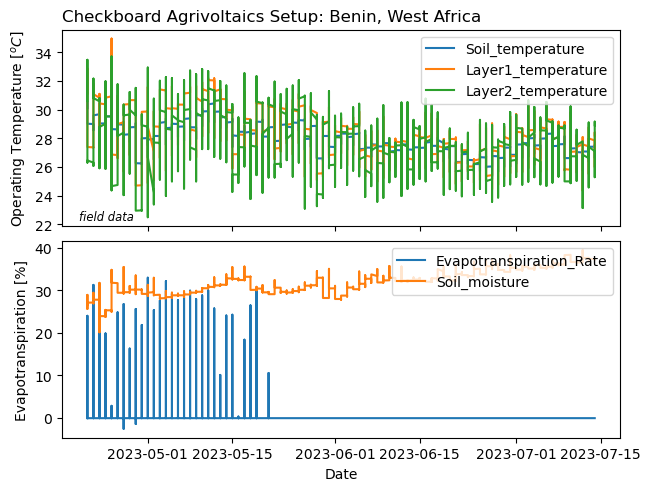

In [74]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, constrained_layout=True)

# temperature:
ax0.plot(date, Checkboard_soil_temperature, label='Soil_temperature')
ax0.plot(date, Checkboard_Layer1_temperature, label='Layer1_temperature')
ax0.plot(date, Checkboard_Layer2_temperature, label='Layer2_temperature')
ax0.legend(loc='upper right')
ax0.set_ylabel('Operating Temperature $[^oC]$')  # note the use of TeX math formatting

# Evapotranspiration:
ax1.plot(date, Evapotranspiration, label='Evapotranspiration_Rate')
ax1.plot(date, Checkboard_soil_moisture, label='Soil_moisture')
ax1.legend(loc='upper right')
ax1.set_ylabel('Evapotranspiration [%]')  
ax1.set_xlabel('Date')
ax0.set_title('Checkboard Agrivoltaics Setup: Benin, West Africa', loc='left')
ax0.text(0.03, 0.03, 'field data', 
         fontsize='small', fontstyle='italic', transform=ax0.transAxes);

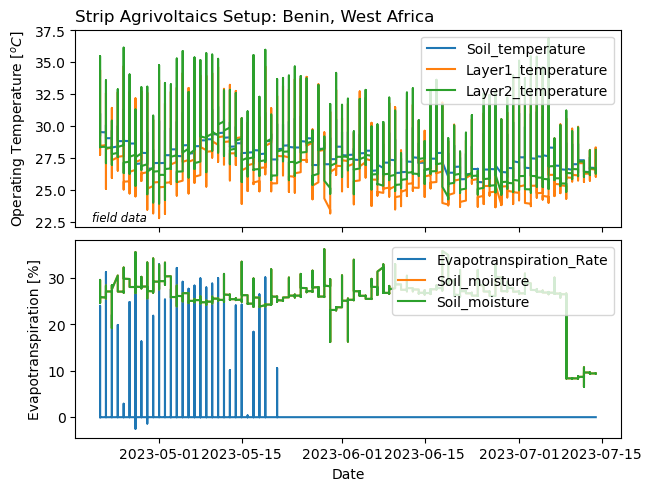

In [75]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, constrained_layout=True)

# temperature:
ax0.plot(date, Strip_soil_temperature, label='Soil_temperature')
ax0.plot(date, Strip_Layer_2_temperature, label='Layer1_temperature')
ax0.plot(date, Strip_Layer_1_temperature, label='Layer2_temperature')
ax0.legend(loc='upper right')
ax0.set_ylabel('Operating Temperature $[^oC]$')  # note the use of TeX math formatting

# Evapotranspiration:
ax1.plot(date, Evapotranspiration, label='Evapotranspiration_Rate')
ax1.plot(date, Strip_soil_moisture, label='Soil_moisture')
ax1.legend(loc='upper right')
ax1.set_ylabel('Evapotranspiration [%]')   # note the use of TeX math formatting
ax1.set_xlabel('Date')
ax0.set_title('Strip Agrivoltaics Setup: Benin, West Africa', loc='left')
ax0.text(0.03, 0.03, 'field data', 
         fontsize='small', fontstyle='italic', transform=ax0.transAxes);

In [76]:
AV_table_height = pd.Series(AV_table_height)

In [77]:
x = radiation
y = Evapotranspiration
z = AV_table_height

fig = plt.figure(figsize=(10, 10))
ax = fig.axes(projection = '3d')
ax.plot_surface(x, y, z)

TypeError: 'list' object is not callable

<Figure size 1000x1000 with 0 Axes>

In [ ]:
df_targets.to_csv('feature_engineered_data1.csv')

In [ ]:
df_targets.head(1)

In [ ]:
from pivottablejs import pivot_ui
pivot_ui(df_targets)

# 4.3 Comparing results with data simulated results
*** Import data from PVGIS web selecting: https://re.jrc.ec.europa.eu/pvg_tools/en/ :
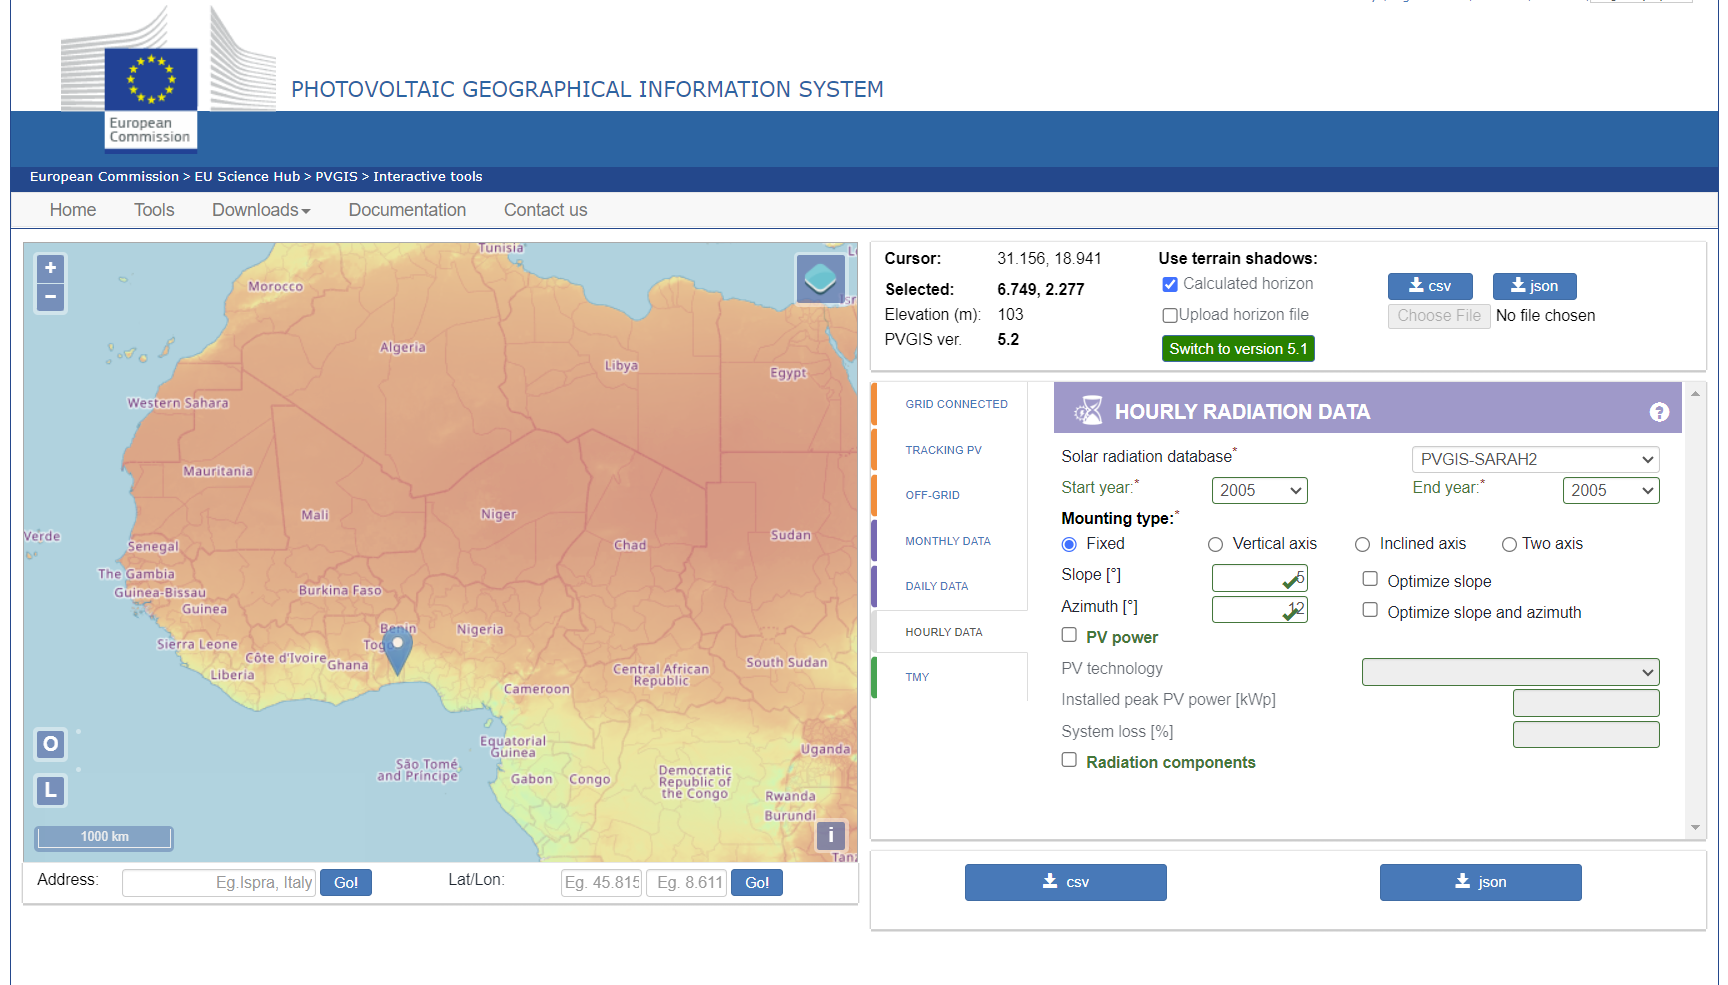

**Meta data:**
* "Latitude (decimal degrees):6.749"			
* "Longitude (decimal degrees):2.277"			
* "Elevation (m):	103"			
* "Radiation database:PVGIS-SARAH2"
* Slope/Tilt: 5 deg. 	
* Azimuth: 12 deg. 	

G(i): Global irradiance on the inclined plane (plane of the array) (W/m2)

H_sun: Sun height (degree)		

T2m: 2-m air temperature (degree Celsius)

WS10m: 10-m total wind speed (m/s)		

Int: 1 means solar radiation values are reconstructed					


# Satelite Data Intrapolation to Enable Comparison

The on-site dataset was characterized by a ten-minute time series resolution, whereas the PVGIS dataset was an hourly resolution. The variance in time resolutions between these two datasets poses a comparative challenge, which is acknowledged as a limitation within the scope of the data analysis. To solve this dataset limitation we applied interpolation. Interpolation was performed on the hourly PVGIS data to estimate values at ten-minute intervals. This creates a continuous time series that can be sampled at any desired frequency. Interpolation methods such as linear, spline, or polynomial can be used depending on the nature of the data.

In our analysis of the datasets, we evaluated two interpolation methods to reconcile the time resolution differences. The first, cubic spline interpolation, had a continuous and smooth curve through the dataset, ideal for capturing the gradual nature of temperature changes. Despite its usefulness, it generated some level of unrealistic values due to overshoots values, especially at the dataset’s endpoints.

Transitioning to the second method, piecewise linear interpolation, this method connects data points with linear segments, ensuring that the interpolated values remained grounded in the actual measurements. Its simplicity and physical accuracy makes it less prone to the pitfalls of more complex method, although it may not capture all the subtleties of temperature fluctuations. Considering the dataset’s pattern and the imperative to accurately reflect measured temperatures, piecewise linear interpolation emerged as the preferred technique, striking a balance between simplicity and fidelity

In [78]:
pvgis_df = pd.read_csv(r"C:\Users\richm\Desktop\PV_GIS_Timeseries_6.749_2.277_SA2_5deg_12deg_2020_2020_resampled.csv", na_values=['-'])
pvgis_df

,DateTime,G(i),H_sun,T2m,WS10m,Int
0,1/1/2020 0:10,0.0,0.0,24.77,1.38,0
1,1/1/2020 0:20,0.0,0.0,24.77,1.38,0
2,1/1/2020 0:30,0.0,0.0,24.77,1.38,0
3,1/1/2020 0:40,0.0,0.0,24.77,1.38,0
4,1/1/2020 0:50,0.0,0.0,24.77,1.38,0
...,...,...,...,...,...,...
52693,12/31/2020 22:20,0.0,0.0,26.05,2.07,0
52694,12/31/2020 22:30,0.0,0.0,26.05,2.07,0
52695,12/31/2020 22:40,0.0,0.0,26.05,2.07,0
52696,12/31/2020 22:50,0.0,0.0,26.05,2.07,0


In [79]:
pvgis_df.columns

Index(['DateTime', 'G(i)', 'H_sun', 'T2m', 'WS10m', 'Int'], dtype='object')

In [80]:
date = pvgis_df['DateTime']
irradiation = pvgis_df['G(i)']
temperature = pvgis_df['T2m']
windspeed =  pvgis_df['WS10m']

In [81]:
# temperature:
ax0.plot(date, temperature, label ='air_temperature')
ax0.plot(date, irradiation, label='irradiance')
ax0.plot(date, windspeed, label='windspeed')
ax0.legend(loc='upper right')
ax0.set_ylabel('Temperature $[^oC]$')  # note the use of TeX math formatting

# Evapotranspiration:
ax1.plot(date, Evapotranspiration, label='Evapotranspiration_Rate')
ax1.plot(date, Strip_soil_moisture, label='Soil_moisture')
ax1.legend(loc='upper right')
ax1.set_ylabel('Evapotranspiration [%]')   # note the use of TeX math formatting

ax0.set_title('Strip Agrivoltaics Setup: Benin, West Africa', loc='left')
ax0.text(0.03, 0.03, 'field data', 
         fontsize='small', fontstyle='italic', transform=ax0.transAxes);

C:\Users\richm\AppData\Local\Temp\ipykernel_46904\1305589121.py:2: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax0.plot(date, temperature, label ='air_temperature')
C:\Users\richm\AppData\Local\Temp\ipykernel_46904\1305589121.py:2: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax0.plot(date, temperature, label ='air_temperature')
C:\Users\richm\AppData\Local\Temp\ipykernel_46904\1305589121.py:2: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax0.plot(date, temperature, label ='air_temperature')


ValueError: x and y must have same first dimension, but have shapes (52698,) and (12171,)

***5.1 Estimatimating water savings: Change in Evapotransperation***

***5.2 Cooling effect determination***



**5.2.1 Cooling Effect for Solar Panel in Layer 1**


**5.2.2 Cooling Effect for Solar Panel in Layer 2**

In [ ]:
x = radiatio
y = Evapotranspiration
z = AV_table_height

In [ ]:
# Workspace

In [ ]:
print(z)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data
xa = x 
ya = y 
za = z 

# Create a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
ax.scatter(xa, ya, za)

# Add labels (optional)
ax.set_xlabel('radiation')
ax.set_ylabel('Evapotranspiration')
ax.set_zlabel('Table Height')

# Show plot
plt.show()


In [ ]:
testz = np.meshgrid(x, y)
len(AV_table_height)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.axes(projection = '3d')
ax.plot_surface(x, y, testz)

# 5. DecisionTree Classifers
Modeling in Machine Learning
* Assigning dependent and independent variables

In [ ]:
X_df_targets

In [ ]:
X_df_targets = df_targets[['Time', 'Ra', 'control_Soil_temp', 'control_layer1_temp', 'control_layer2_temp', 'control_soil_moisture', 'strip_soil_temp_avg','strip_soil_moisture_avg', 'strip_layer1_temp_avg','strip_layer2_temp_avg', 'strip_soil_moisture_avg','checkboard_soil_temp_avg', 'checkboard_layer1_temp_avg','checkboard_layer2_temp_avg', 'checkboard_soil_moisture_avg']]


y_df_targets = df_targets[['Evapotranspiration']]

In [ ]:
y_df_targets

* Splitting into train and test datasets

In [ ]:
# Model Training
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

In [104]:
# Splitting into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df_targets, y_df_targets, test_size=0.30, random_state=15)
df_targets(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

NameError: name 'x_train' is not defined